#  Project 2: Does geographical location affect soccer players ability to develop certain attributes which make them more suitable for a certain position than others and if so, can they be used to predict where specific players could be selected from by clubs according to demand for primary and reserve squads according to attribute requirement.

# Outline: Attributes play a vital role in selection of soccer players into clubs primary and reserve teams. As these attributes dictate their fit in the team’s overall statistical plan and requirement. In this project as a part of the Capstone Project, I wish to assess that can geographic locations affect a player’s ability to develop/inculcate certain attributes more than others and create algorithms that could be used by head-hunters to narrow down searches to specific countries according to their requirements and select the best players possible.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import datetime
sns.set()

In [8]:
data=pd.read_csv('F:/The Data Incubator/Fifa 19_data.csv')

In [9]:
new_data= data.copy()
new_data

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [10]:
Brazil_data=new_data.loc[new_data['Nationality'] == 'Brazil'].copy()
Brazil_data

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
27,27,200145,Casemiro,26,https://cdn.sofifa.org/players/4/19/200145.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,90,Real Madrid,...,84.0,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0,€126.4M
32,32,189242,Coutinho,26,https://cdn.sofifa.org/players/4/19/189242.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,89,FC Barcelona,...,85.0,55.0,54.0,47.0,12.0,7.0,9.0,14.0,6.0,€147.7M
35,35,176676,Marcelo,30,https://cdn.sofifa.org/players/4/19/176676.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,88,Real Madrid,...,86.0,71.0,85.0,86.0,12.0,5.0,5.0,5.0,9.0,€88.2M
39,39,164240,Thiago Silva,33,https://cdn.sofifa.org/players/4/19/164240.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,88,Paris Saint-Germain,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,€44.4M
57,57,210257,Ederson,24,https://cdn.sofifa.org/players/4/19/210257.png,Brazil,https://cdn.sofifa.org/flags/54.png,86,90,Manchester City,...,70.0,28.0,15.0,8.0,85.0,80.0,91.0,82.0,87.0,€79.9M
61,61,201942,Roberto Firmino,26,https://cdn.sofifa.org/players/4/19/201942.png,Brazil,https://cdn.sofifa.org/flags/54.png,86,87,Liverpool,...,87.0,60.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,€104.7M
64,64,191043,Alex Sandro,27,https://cdn.sofifa.org/players/4/19/191043.png,Brazil,https://cdn.sofifa.org/flags/54.png,86,86,Juventus,...,82.0,81.0,84.0,84.0,7.0,7.0,9.0,12.0,5.0,€60.2M
65,65,190483,Douglas Costa,27,https://cdn.sofifa.org/players/4/19/190483.png,Brazil,https://cdn.sofifa.org/flags/54.png,86,86,Juventus,...,84.0,45.0,38.0,34.0,13.0,15.0,9.0,12.0,5.0,€76.7M
75,75,135507,Fernandinho,33,https://cdn.sofifa.org/players/4/19/135507.png,Brazil,https://cdn.sofifa.org/flags/54.png,86,86,Manchester City,...,79.0,85.0,85.0,80.0,12.0,11.0,5.0,13.0,7.0,€33.3M


In [14]:
Brazil_ST_data=Brazil_data.loc[Brazil_data['Position'] == 'ST'].copy()
Brazil_ST_data

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
145,145,176769,Jonas,34,https://cdn.sofifa.org/players/4/19/176769.png,Brazil,https://cdn.sofifa.org/flags/54.png,84,84,SL Benfica,...,87.0,31.0,36.0,25.0,12.0,11.0,7.0,8.0,5.0,€33M
156,156,230666,Gabriel Jesus,21,https://cdn.sofifa.org/players/4/19/230666.png,Brazil,https://cdn.sofifa.org/flags/54.png,83,92,Manchester City,...,82.0,53.0,23.0,19.0,13.0,8.0,6.0,6.0,15.0,€84.1M
159,159,230294,Louri Beretta,26,https://cdn.sofifa.org/players/4/19/230294.png,Brazil,https://cdn.sofifa.org/flags/54.png,83,83,Atlético Mineiro,...,79.0,26.0,27.0,24.0,8.0,11.0,20.0,19.0,20.0,€54.2M
275,275,195093,Willian José,26,https://cdn.sofifa.org/players/4/19/195093.png,Brazil,https://cdn.sofifa.org/flags/54.png,82,83,Real Sociedad,...,75.0,40.0,32.0,30.0,15.0,14.0,16.0,15.0,8.0,€57.6M
518,518,180175,Alexandre Pato,28,https://cdn.sofifa.org/players/4/19/180175.png,Brazil,https://cdn.sofifa.org/flags/54.png,80,80,Tianjin Quanjian FC,...,74.0,35.0,23.0,19.0,16.0,7.0,13.0,15.0,8.0,€33.3M
560,560,231943,Richarlison,21,https://cdn.sofifa.org/players/4/19/231943.png,Brazil,https://cdn.sofifa.org/flags/54.png,79,86,Everton,...,77.0,46.0,44.0,36.0,12.0,7.0,8.0,11.0,13.0,€37.8M
563,563,230498,Luimo Boas Santos,30,https://cdn.sofifa.org/players/4/19/230498.png,Brazil,https://cdn.sofifa.org/flags/54.png,79,79,Santos,...,73.0,27.0,20.0,19.0,9.0,12.0,8.0,10.0,9.0,€22.8M
662,662,192598,Elkeson,28,https://cdn.sofifa.org/players/4/19/192598.png,Brazil,https://cdn.sofifa.org/flags/54.png,79,79,Shanghai SIPG FC,...,76.0,30.0,57.0,35.0,9.0,16.0,7.0,8.0,7.0,€28.6M
758,758,224116,Dyego Sousa,28,https://cdn.sofifa.org/players/4/19/224116.png,Brazil,https://cdn.sofifa.org/flags/54.png,78,78,SC Braga,...,68.0,23.0,22.0,27.0,15.0,7.0,12.0,7.0,9.0,€21M
994,994,137809,Vágner Love,34,https://cdn.sofifa.org/players/4/19/137809.png,Brazil,https://cdn.sofifa.org/flags/54.png,77,77,Beşiktaş JK,...,74.0,31.0,33.0,25.0,16.0,16.0,13.0,8.0,6.0,€8.9M


Text(0, 0.5, 'Attributes')

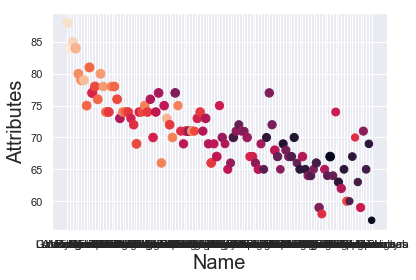

In [32]:
x= Brazil_ST_data['Name']
y1=Brazil_ST_data['Finishing']
y2=Brazil_ST_data['Positioning']
y3=Brazil_ST_data['Reactions']
plt.scatter(x,y1,y2,y3,)
plt.xlabel('Name', fontsize=20)
plt.ylabel('Attributes', fontsize=20)

In [30]:
Germany_data=new_data.loc[new_data['Nationality'] == 'Germany'].copy()
Germany_data

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
11,11,182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M
18,18,192448,M. ter Stegen,26,https://cdn.sofifa.org/players/4/19/192448.png,Germany,https://cdn.sofifa.org/flags/21.png,89,92,FC Barcelona,...,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,€123.3M
22,22,167495,M. Neuer,32,https://cdn.sofifa.org/players/4/19/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,89,89,FC Bayern München,...,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,€62.7M
34,34,178603,M. Hummels,29,https://cdn.sofifa.org/players/4/19/178603.png,Germany,https://cdn.sofifa.org/flags/21.png,88,88,FC Bayern München,...,91.0,88.0,90.0,88.0,15.0,6.0,10.0,5.0,6.0,€75.9M
55,55,222492,L. Sané,22,https://cdn.sofifa.org/players/4/19/222492.png,Germany,https://cdn.sofifa.org/flags/21.png,86,92,Manchester City,...,78.0,36.0,32.0,35.0,8.0,12.0,9.0,9.0,14.0,€125.1M
66,66,189596,T. Müller,28,https://cdn.sofifa.org/players/4/19/189596.png,Germany,https://cdn.sofifa.org/flags/21.png,86,86,FC Bayern München,...,83.0,44.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0,€74.3M
68,68,188350,M. Reus,29,https://cdn.sofifa.org/players/4/19/188350.png,Germany,https://cdn.sofifa.org/flags/21.png,86,86,Borussia Dortmund,...,84.0,47.0,36.0,45.0,12.0,12.0,13.0,13.0,11.0,€74M
74,74,176635,M. Özil,29,https://cdn.sofifa.org/players/4/19/176635.png,Germany,https://cdn.sofifa.org/flags/21.png,86,86,Arsenal,...,82.0,24.0,16.0,19.0,6.0,14.0,10.0,6.0,14.0,€82.7M
82,82,212622,J. Kimmich,23,https://cdn.sofifa.org/players/4/19/212622.png,Germany,https://cdn.sofifa.org/flags/21.png,85,88,FC Bayern München,...,82.0,75.0,81.0,79.0,8.0,15.0,7.0,15.0,15.0,€69.9M
95,95,183907,J. Boateng,29,https://cdn.sofifa.org/players/4/19/183907.png,Germany,https://cdn.sofifa.org/flags/21.png,85,85,FC Bayern München,...,84.0,84.0,87.0,87.0,7.0,12.0,15.0,6.0,5.0,€49.5M


In [31]:
Germany_GK_data=Germany_data.loc[Germany_data['Position'] == 'GK'].copy()
Germany_GK_data

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18,18,192448,M. ter Stegen,26,https://cdn.sofifa.org/players/4/19/192448.png,Germany,https://cdn.sofifa.org/flags/21.png,89,92,FC Barcelona,...,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,€123.3M
22,22,167495,M. Neuer,32,https://cdn.sofifa.org/players/4/19/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,89,89,FC Bayern München,...,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,€62.7M
131,131,192563,B. Leno,26,https://cdn.sofifa.org/players/4/19/192563.png,Germany,https://cdn.sofifa.org/flags/21.png,84,87,Arsenal,...,66.0,27.0,15.0,18.0,84.0,82.0,75.0,85.0,82.0,€53.3M
189,189,200316,T. Horn,25,https://cdn.sofifa.org/players/4/19/200316.png,Germany,https://cdn.sofifa.org/flags/21.png,83,87,1. FC Köln,...,20.0,14.0,13.0,12.0,83.0,80.0,83.0,82.0,86.0,€37.8M
197,197,193698,O. Baumann,28,https://cdn.sofifa.org/players/4/19/193698.png,Germany,https://cdn.sofifa.org/flags/21.png,83,84,TSG 1899 Hoffenheim,...,52.0,15.0,18.0,14.0,82.0,82.0,70.0,82.0,85.0,€37.3M
210,210,179783,R. Fährmann,29,https://cdn.sofifa.org/players/4/19/179783.png,Germany,https://cdn.sofifa.org/flags/21.png,83,84,FC Schalke 04,...,61.0,10.0,12.0,10.0,83.0,81.0,52.0,82.0,87.0,€35.5M
504,504,188943,K. Trapp,27,https://cdn.sofifa.org/players/4/19/188943.png,Germany,https://cdn.sofifa.org/flags/21.png,80,81,Eintracht Frankfurt,...,62.0,15.0,14.0,10.0,79.0,74.0,77.0,82.0,83.0,NaN
509,509,186569,S. Ulreich,29,https://cdn.sofifa.org/players/4/19/186569.png,Germany,https://cdn.sofifa.org/flags/21.png,80,80,FC Bayern München,...,45.0,16.0,18.0,14.0,79.0,72.0,69.0,80.0,86.0,€16.5M
620,620,203775,L. Karius,25,https://cdn.sofifa.org/players/4/19/203775.png,Germany,https://cdn.sofifa.org/flags/21.png,79,83,Beşiktaş JK,...,60.0,9.0,11.0,13.0,82.0,74.0,78.0,76.0,82.0,NaN
680,680,186148,R. Zieler,29,https://cdn.sofifa.org/players/4/19/186148.png,Germany,https://cdn.sofifa.org/flags/21.png,79,80,VfB Stuttgart,...,61.0,20.0,12.0,13.0,75.0,76.0,70.0,79.0,81.0,€17.8M


Text(0, 0.5, 'Attributes')

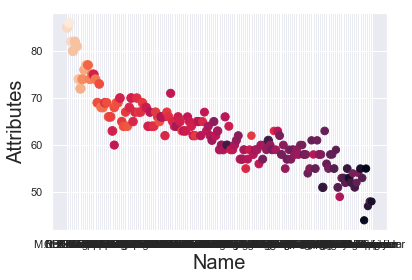

In [33]:
x= Germany_GK_data['Name']
y1=Germany_GK_data['GKHandling']
y2=Germany_GK_data['GKReflexes']
y3=Germany_GK_data['GKPositioning']
plt.scatter(x,y1,y2,y3,)
plt.xlabel('Name', fontsize=20)
plt.ylabel('Attributes', fontsize=20)

# Note: The data source used in this project is from FIFA 19 which is a video game created by EA sports and all the attributes and information is collected based on the statistical analysis carried out by FIFA and the respective leagues and represents the abilities of the players in real life.